<a href="https://colab.research.google.com/github/serithemage/DataScienctPractice/blob/main/%ED%86%B5%EC%8B%A0%EC%82%AC_%EA%B3%A0%EA%B0%9D_%EC%9D%B4%ED%83%88_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret -q

     |████████████████████████████████| 320 kB 26.0 MB/s 
     |████████████████████████████████| 17.8 MB 767 kB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 167 kB 64.2 MB/s 
     |████████████████████████████████| 120 kB 64.8 MB/s 
     |████████████████████████████████| 262 kB 60.6 MB/s 
     |████████████████████████████████| 6.8 MB 52.3 MB/s 
     |████████████████████████████████| 2.0 MB 65.0 MB/s 
     |████████████████████████████████| 1.7 MB 73.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.2 MB/s 
     |████████████████████████████████| 1.3 MB 64.3 MB/s 
     |████████████████████████████████| 1.3 MB 59.7 MB/s 
     |████████████████████████████████| 636 kB 63.3 MB/s 
     |████████████████████████████████| 690 kB 55.4 MB/s 
     |█████████████████

In [2]:
!pip install markupsafe==2.0.1 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


데이터 다운로드

In [4]:
import pandas as pd

- 데이터 로드
  - 데이터 상세: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Pandas profiling으로 직접 데이터셋을 조사해 봅시다.

In [18]:
!pip install -q pandas-profiling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [19]:
import pandas_profiling

In [20]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

이제 Pycaret으로 모델을 만들어 봅시다. 아래 내용들은 pycaret 2진분류 튜토리얼을 데이터만 바꿔서 거의 그대로 실행한겁니다.

In [6]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
exp = setup(df, target='Churn')

,Description,Value
0,session_id,3677
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
df.shape

(7043, 21)

In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8037,0.8408,0.4829,0.6785,0.5634,0.4414,0.4525,22.341
lr,Logistic Regression,0.8030,0.8382,0.5340,0.6544,0.5872,0.4598,0.4644,28.853
ridge,Ridge Classifier,0.7984,0.0000,0.4915,0.6573,0.5612,0.4340,0.4425,2.766
ada,Ada Boost Classifier,0.7972,0.8410,0.5239,0.6402,0.5754,0.4440,0.4484,6.383
lightgbm,Light Gradient Boosting Machine,0.7919,0.8277,0.5100,0.6284,0.5625,0.4280,0.4324,0.751
rf,Random Forest Classifier,0.7858,0.8157,0.4243,0.6402,0.5097,0.3798,0.3934,9.214
et,Extra Trees Classifier,0.7773,0.8027,0.4235,0.6123,0.4995,0.3624,0.3733,12.671
dt,Decision Tree Classifier,0.7748,0.6893,0.5093,0.5827,0.5420,0.3940,0.3965,0.596
knn,K Neighbors Classifier,0.7568,0.7671,0.4891,0.5407,0.5127,0.3515,0.3527,6.065
svm,SVM - Linear Kernel,0.7542,0.0000,0.4358,0.4865,0.4136,0.2996,0.3284,5.920


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3677, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7789,0.8078,0.5271,0.5862,0.5551,0.4086,0.4096
1,0.8114,0.8646,0.5194,0.6837,0.5903,0.4707,0.4782
2,0.8012,0.8443,0.5194,0.6505,0.5776,0.4497,0.4546
3,0.7951,0.8269,0.4961,0.6400,0.5590,0.4283,0.4342
4,0.7951,0.8127,0.5039,0.6373,0.5628,0.4314,0.4364
5,0.7789,0.8045,0.4961,0.5926,0.5401,0.3961,0.3988
6,0.8093,0.8555,0.5462,0.6698,0.6017,0.4781,0.4824
7,0.7850,0.8360,0.4692,0.6224,0.5351,0.3988,0.4055
8,0.7728,0.8009,0.4615,0.5882,0.5172,0.3715,0.3762


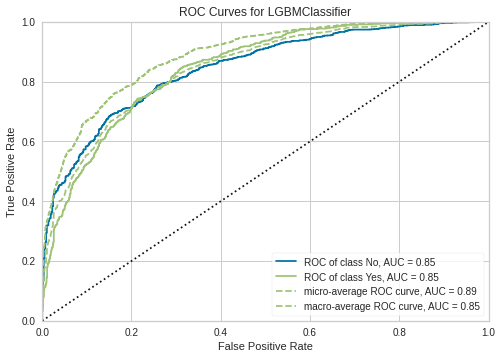

In [11]:
plot_model(model)

In [12]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7951,0.8118,0.5349,0.6273,0.5774,0.4433,0.4458
1,0.8316,0.8693,0.5271,0.7556,0.6210,0.5172,0.5310
2,0.8134,0.8476,0.5194,0.6907,0.5929,0.4750,0.4831
3,0.7911,0.8441,0.4651,0.6383,0.5381,0.4074,0.4159
4,0.7931,0.8244,0.4496,0.6517,0.5321,0.4050,0.4165
5,0.7789,0.8208,0.4884,0.5943,0.5362,0.3929,0.3961
6,0.8195,0.8562,0.5769,0.6881,0.6276,0.5097,0.5131
7,0.7992,0.8414,0.4692,0.6703,0.5520,0.4278,0.4391
8,0.8032,0.8447,0.4769,0.6813,0.5611,0.4393,0.4509


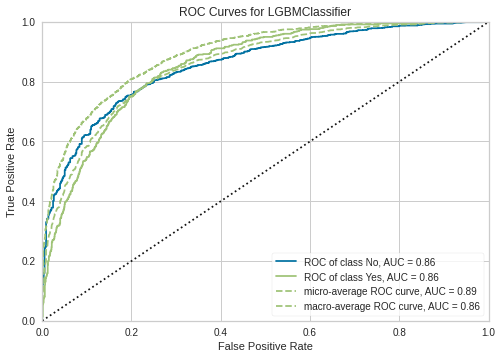

In [13]:
plot_model(tuned_model)

하이퍼파라미터를 튜닝하니 미세하게나마 수치가 좋아진것을 알 수 있습니다.

이제 어떤 특징이 이탈율에 크게 영향을 미치는지 알아봅시다.

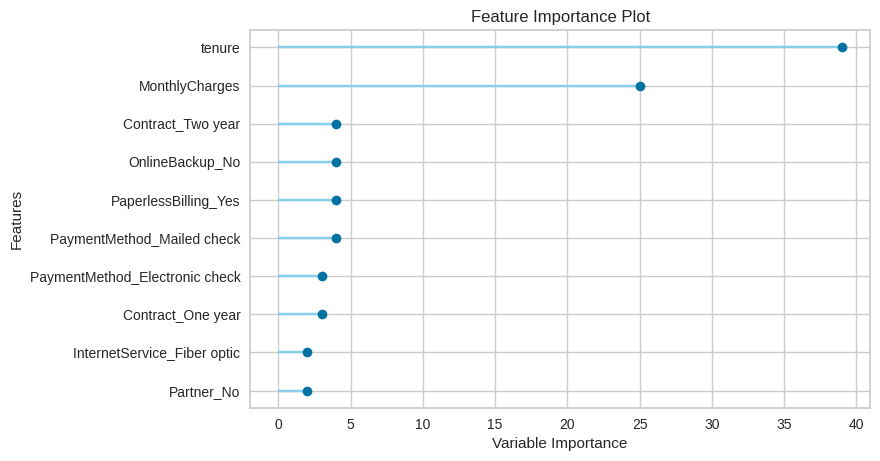

In [14]:
plot_model(tuned_model, plot='feature')

# 결론
Statista의 데이터 과학자이신 아만다님이 이 데이터 셋을 가지고 프로젝트를 진행한 블로그 입니다.

https://towardsdatascience.com/end-to-end-machine-learning-project-telco-customer-churn-90744a8df97d

위 블로그에서 아만다가 얻은 정확도는 0.79749이고 Pycaret으로 만든 정확도는 0.8012 입니다.

이를 통해 얻을 수 있는 결론은 학습 가능한 형태로 데이터를 준비할 수 있는 능력만 있다면 머신러닝에 대해 깊은 지식이나 경험이 없어도 숙련된 데이터 과학자보다 더 나은 결과를 얻을 수도 있다는 것 입니다.

PyCaret🥕짱!